## Introduction

L'objectif de ce Notebook est de montrer l'intérêt de changer de représentation pour observer un signal. Dans le cas de signaux de dimension finie $N$, il s'agira de représenter le vecteur sur une autre base que la base canonique, notamment la base de Fourier.

#### mots clefs
Fourier, Changement de base, numpy array

## Approximation d'un signal
Le module `numpy` de python permet de définir des données de type `array` pour lesquelles les opérations courantes telles transposition et produit matriciel sont déjà codées. Essayer l'exemple suivant : 


In [2]:
import numpy as np

A = np.array(((1, 2, 1j), (1, 2j, 3)))
print(A,'\n ---- \n',A.T, '\n ---- \n', A.conj().T, '\n ---- \n', A.dot(A.conj().T), '\n ----')
print(A.dtype)
print(A.shape)

[[1.+0.j 2.+0.j 0.+1.j]
 [1.+0.j 0.+2.j 3.+0.j]] 
 ---- 
 [[1.+0.j 1.+0.j]
 [2.+0.j 0.+2.j]
 [0.+1.j 3.+0.j]] 
 ---- 
 [[1.-0.j 1.-0.j]
 [2.-0.j 0.-2.j]
 [0.-1.j 3.-0.j]] 
 ---- 
 [[ 6.+0.j  1.-1.j]
 [ 1.+1.j 14.+0.j]] 
 ----
complex128
(2, 3)


#### Exercice
On considère la matrice $\mathbf{A}=\begin{bmatrix} 
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1 
\end{bmatrix}$ et le vecteur $\mathbf{x}=\begin{bmatrix} 
1+\epsilon_1  \\
1  \\
-1  \\
-1-\epsilon_2 
\end{bmatrix}$ avec $\epsilon_1,\,\epsilon_2 \ll 1$.
1. Calculer le vecteur $\mathbf{y}=\mathbf{Ax}$.
2. $1+\epsilon_1,\, 1,\, -1,\, -1-\epsilon_2$ sont par définition les coefficients du vecteur $\mathbf{x}$ dans la base canonique de $\mathbb{C}^4$. Montrer qu'il existe une base $B=\{\mathbf{b_1},\mathbf{b_2},\mathbf{b_3},\mathbf{b_4}\}$ dans laquelle les coefficients du vecteur $\mathbf{x}$ sont les $y_i$. Calculer la matrice $\mathbf{B}=[\mathbf{b_1}\,\mathbf{b_2}\,\mathbf{b_3},\mathbf{b_4}]$.
3. Proposer une approximation *parcimonieuse* de $\mathbf{x}$, notée $\mathbf{P_x}$ qui sera définie par deux coefficients non nuls seulement dans la base $B$. Construire une fonction python `approx` qui renvoie $\mathbf{P_x}$ et prend $(\epsilon_1,\,\epsilon_2)$ en entrée.

1. $\mathbf{y}=\begin{bmatrix} 
2+\epsilon_1  \\
\epsilon_1 \\
-2-\epsilon_2  \\
\epsilon_2
\end{bmatrix}$
2. Comme la marice $A$ est inversible il s'agit d'une matrice de cahngement de base , vers une base $B$ dont les vecteurs sont les colonnes de A son inverse est $1/2 . A$
3. 

In [3]:
def approx(eps1,eps2):
    return np.array([2+eps1,0,-2-esp2,0])

   ## Base de Fourier dicrète
   La base de Fourier Discrète sur N points est une base d’ondes pures ou encore sinusoïdes complexes de la forme : $$\mathbf{e}_k(n) = \dfrac{1}{N} \exp(i2\pi\frac{k}{N}n),\: k=0,1,\ldots,N-1.$$
   La décomposition sur cette base d'un signal fini $\mathbf{x}$ donne sa *Transformée de Fourier Discrète*, notée $\mathbf{X}$.

#### Exercice
1. Ecrire une fonction `fourier(k,N)` qui retourne le vecteur colonne `ek` de dimension $N$ pour un $k$ donné.
2. Calculer la matrice $\mathbf{E}=[\mathbf{e}_0,\, \mathbf{e}_1,\, \ldots,\, \mathbf{e}_{N-1}]$. Afficher alors la valeur $\mathbf{E}^H\mathbf{E}$ et en déduire que la base est orthogonale.
3. A l’aide du module `matplotlib` tracer le graphe de $\mathrm{Re}(\mathbf{e}_k(n))$ en fonction de $n$ pour quelques valeurs de k (typ. 0,1,2,3) et $N=64$. Quelle caractéristique commune partagent ces fonctions de $n$ ?
4. Construire une fonction `tfd` qui renvoie dans un vecteur $\mathbf{X}$ les coefficients du vecteur $\mathbf{x}$ dans la base des $\mathbf{e}_k$. Vérifier votre calcul sur un vecteur aléatoire (module `numpy.random`) de dimension $N=8$ à l'aide de la fonction `fft` du module `numpy.fft`. 



[[ 0.5+0.000000e+00j  0.5+0.000000e+00j]
 [ 0.5+0.000000e+00j -0.5+6.123234e-17j]]


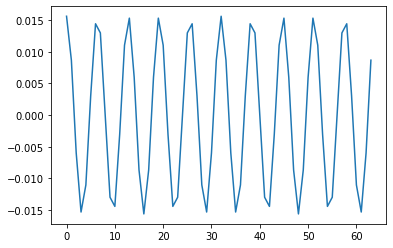

[-1.00795778 -0.3924591   1.04861225 -0.25475334 -0.6994922  -0.97740543
  0.46712623 -0.22866203]
[-2.04499141+0.00000000e+00j  0.12360327-9.76656197e-01j
 -3.22318845+8.86449162e-01j -0.74053444+1.86315852e-01j
  1.66156841+1.19358897e-15j -0.74053444-1.86315852e-01j
 -3.22318845-8.86449162e-01j  0.12360327+9.76656197e-01j]
[-2.04499141+0.j          0.12360327-0.9766562j  -3.22318845+0.88644916j
 -0.74053444+0.18631585j  1.66156841+0.j         -0.74053444-0.18631585j
 -3.22318845-0.88644916j  0.12360327+0.9766562j ]


In [4]:
########### Q1
def fourier(k,N):
    return np.array([(1/N)*np.exp(2j*np.pi*k*i/N) for i in range(N)])
########### Q2
N=2
E= np.array([fourier(i,N) for i in range(N)])
print(E)
np.dot(np.transpose(E),E)
########### Q3

import matplotlib.pyplot as plt
plt.plot(np.real(fourier(10,64)))
plt.show()
N=8

########### Q4

def tfd(x):
    N=len(x)
    return np.array([N*np.dot(x,np.conj(fourier(i,N))) for i in range(N)])
test= np.random.randn(8)
print(test)
print(tfd(test))
print(np.fft.fft(test))

#### Application
Construire le signal $x(n)=\cos (2\pi \nu_0 n)+ b(n)$ où $b(n)$ est un bruit blanc gaussien de variance 1, pour $n=0,1,\ldots,N-1$, $N=128$, $\nu_0 = 10/N$. Afficher sur deux graphes disctincts :
* le signal $x(n)$ en fonction de $n$,
* les valeurs $|X(k)|$ en fonction de $k$ et en décibels.

Essayer ensuite avec $\nu_0=0.1$. Pour quelle(s) valeur(s) de $k$, $X(k)$ atteint t-il un maximum global. A quelle valeur de fréquence réduite $\nu$ cela correspond-il ? Commentez ces résultats en terme de précision de la représentation. 

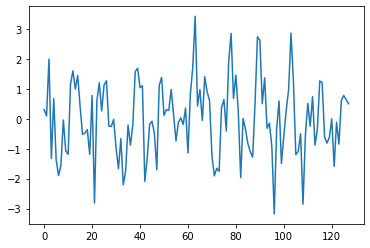

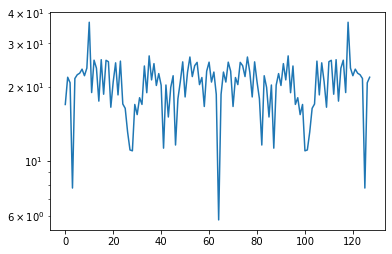

In [5]:
N=128
def f(n):
    return np.cos(2*np.pi*(10/N)*n)+np.random.randn()
def x():
    return np.array([f(i) for i in range(N)])
plt.plot(x())
plt.show()
X=np.fft.fft(x())
plt.semilogy([20*np.log10(abs(s)) for s in X])
plt.show()

En essayant avec 0.1 :
pour k=10 on a un max , ce qui corresponds à $\nu=10/100$ ce qui est attendu

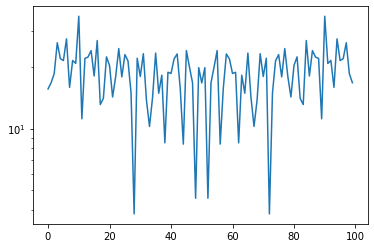

In [6]:
N=100
X=np.fft.fft(x())
plt.semilogy([20*np.log10(abs(s)) for s in X])
plt.show()